In [2]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
fruits = np.load('./data/fruits_300.npy')

#데이터가 300이고 이미지는 100 * 100 이고 흑백(3차원) * 컬러는 (4차원)
fruits.shape

(300, 100, 100)

In [4]:
# 세로 픽셀을 출력 - 0 ~ 255의 숫자, 색상 농도
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


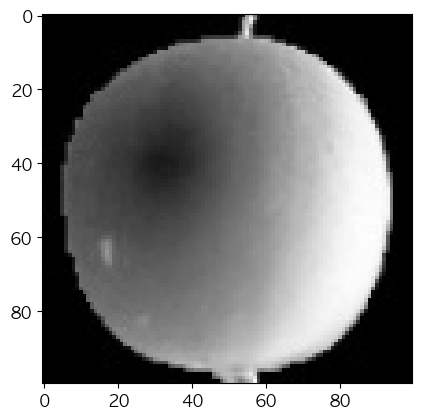

In [5]:
# 이미지 출력
plt.imshow(fruits[0], cmap='gray')
plt.show()

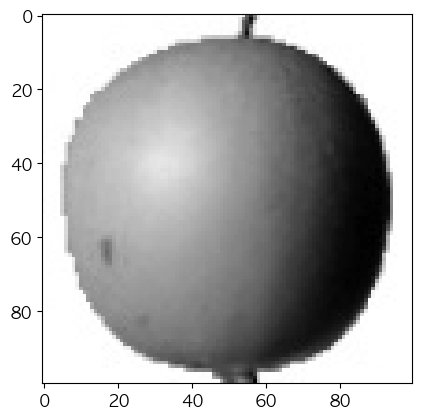

In [6]:
# 이미지 출력
# 우리가 관심을 갖는 것은 물체이므로 물체 이외의 부분은 흰색으로 보여지는 것이 더 나은 경우가 있음.

plt.imshow(fruits[0], cmap='gray_r')
plt.show()

In [7]:
# 이미지 데이터를 비교하기 위해서 1차원으로 변경
print(fruits[0].reshape(-1, 100*100))
print(fruits[0].flatten())

[[1 1 1 ... 1 1 1]]
[1 1 1 ... 1 1 1]


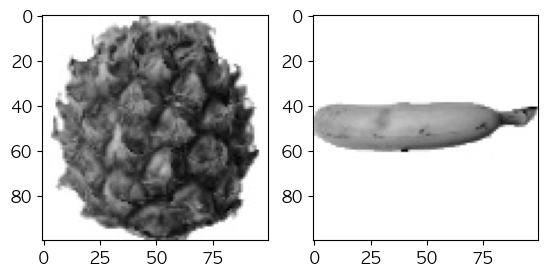

In [8]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [9]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


In [10]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


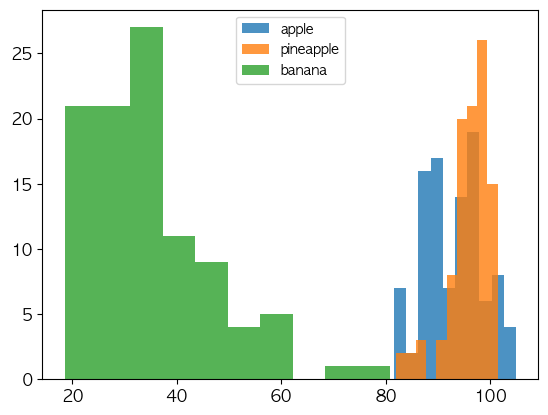

In [11]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

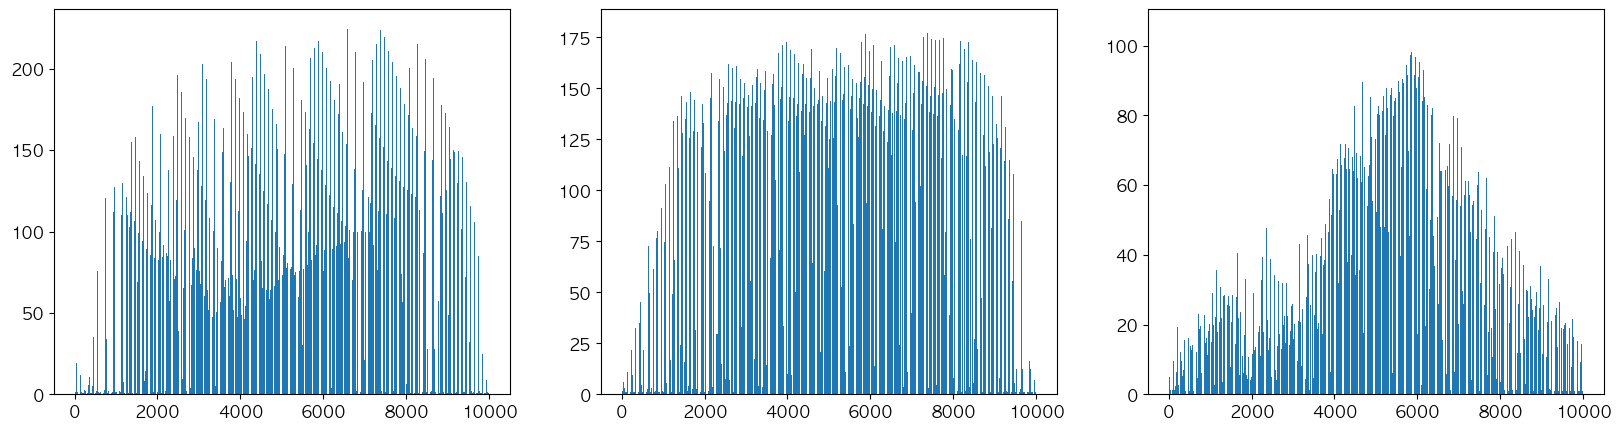

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

[[1.01 1.01 1.01 ... 1.   1.   1.  ]
 [1.01 1.01 1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]
 ...
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]]


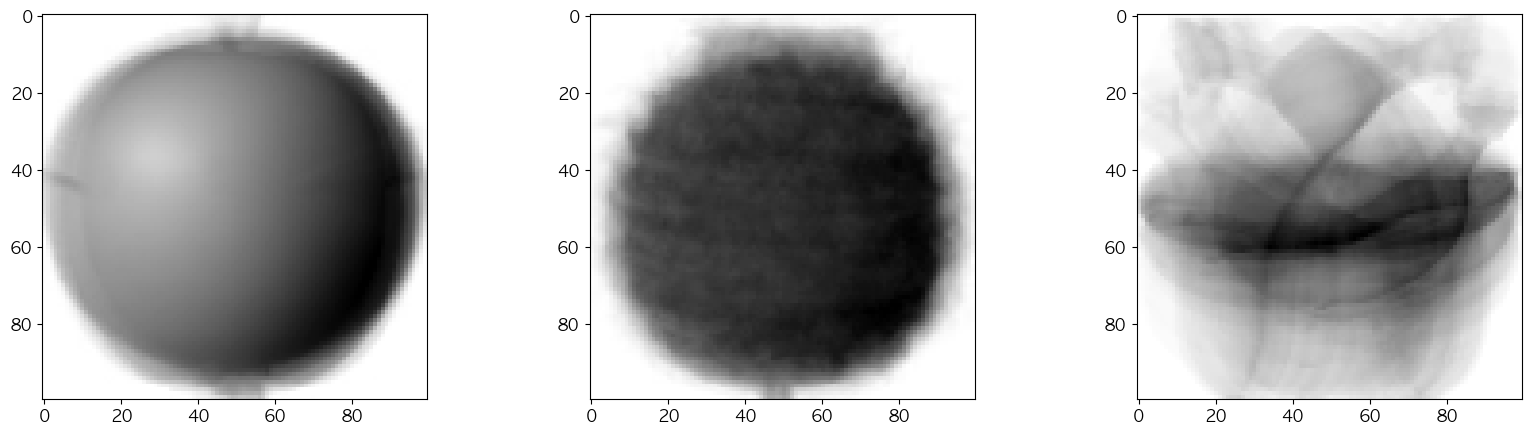

In [13]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
print(apple_mean)
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

(300,)


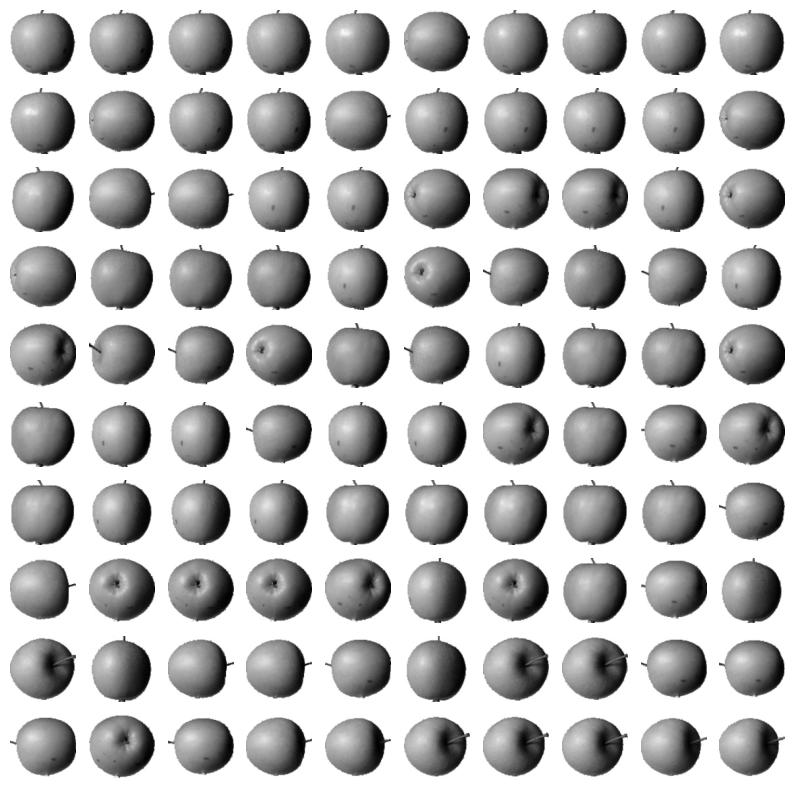

In [14]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

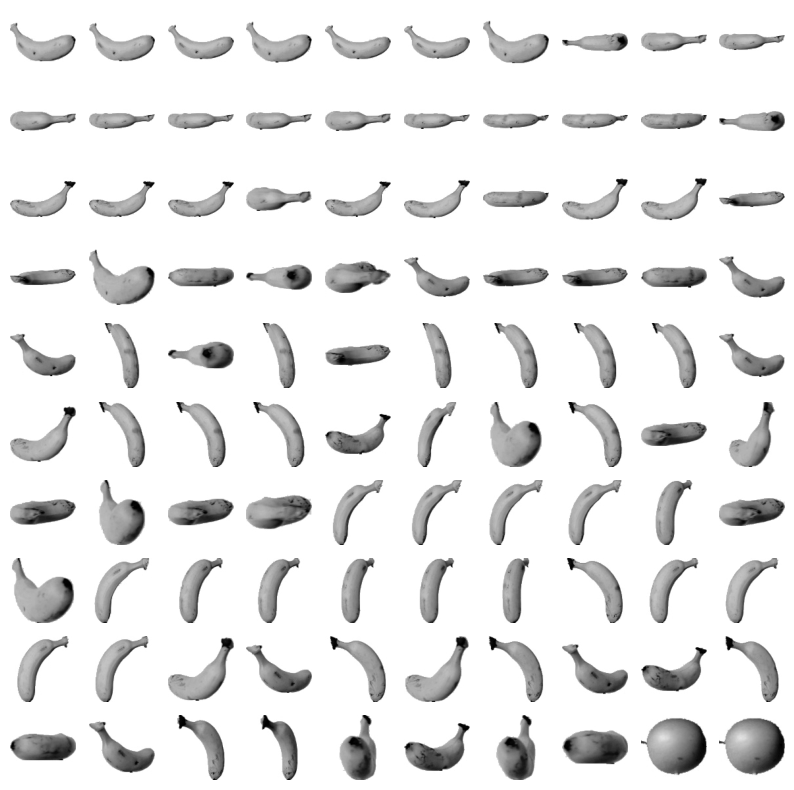

In [15]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

In [16]:
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 데이터 생성
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

그림 저장: blobs_plot


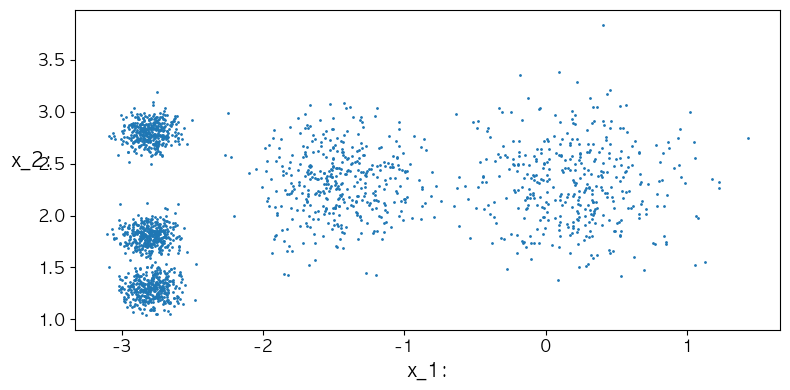

In [18]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('x_1:', fontsize=14)
    plt.ylabel('x_2:', fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig('blobs_plot')
plt.show()

# 군집  수행

In [19]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[2 1 3 ... 1 2 0]


In [20]:
# 각 그룹의 중앙정 좌표 출력
print(kmeans.cluster_centers_)

[[-2.80372723  1.80873739]
 [ 0.20925539  2.30351618]
 [-2.79846237  2.80004584]
 [-1.4453407   2.32051326]
 [-2.79244799  1.2973862 ]]


In [24]:
# 예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new))


[1 1 2 2]


그림 저장: voronoi_plot


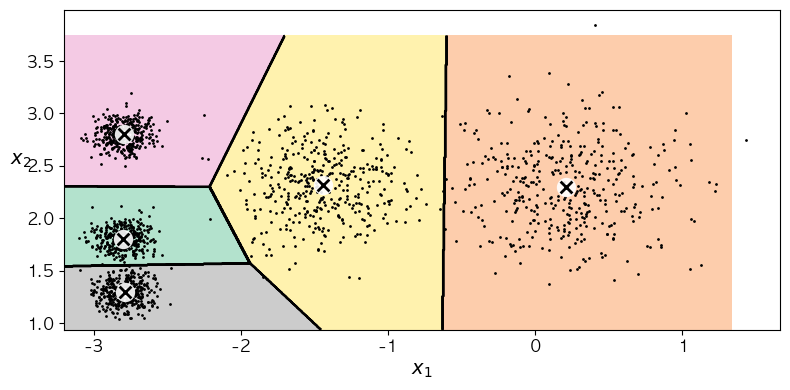

In [27]:
# 결정 경계 시각화 - voronoi diagram()
# voronoi diagram: 평면을 특정 점까지의 거리가 가까운 점의 집합으로 분할한 그림

# 데이터의 분포를 시각화함
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) - 0.1

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidth=1, colors='k')
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig('voronoi_plot')
plt.show()
    


In [29]:
# 각 영역마다의 기준점에서의 거리. (유클리드 거리 - 직선 거리)
print(kmeans.transform(X_new))
print(kmeans.predict(X_new))

[[2.81024337 0.36865958 2.91057812 1.48045212 2.87948466]
 [5.80687792 2.80720102 5.85339553 4.45688037 5.8349053 ]
 [1.20732332 3.28396253 0.28389977 1.69666372 1.71521765]
 [0.7185868  3.21526454 0.36144837 1.56498595 1.22039247]]
[1 1 2 2]


In [30]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81024337, 0.36865958, 2.91057812, 1.48045212, 2.87948466],
       [5.80687792, 2.80720102, 5.85339553, 4.45688037, 5.8349053 ],
       [1.20732332, 3.28396253, 0.28389977, 1.69666372, 1.71521765],
       [0.7185868 , 3.21526454, 0.36144837, 1.56498595, 1.22039247]])

In [32]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

minibatch_kmeans.inertia_

231.37642313963232

In [33]:
# 이너셔를 이용한 최적의 클러스터 개수 찾기
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[3535.9029734094256, 1169.8353666960006, 662.9480744834832, 265.87402716855036, 213.42177131258913, 173.39645036652453, 147.25047404674626, 122.21250397544874, 107.12794033222039]


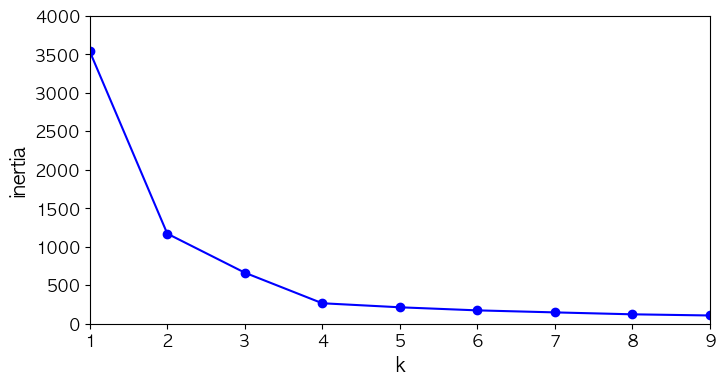

In [34]:
# elbow를 찾기 위해서 시각화
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel('k', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.axis([1, 9, 0, 4000])
plt.show()


그림 저장: silhouette_score_vs_k_plot


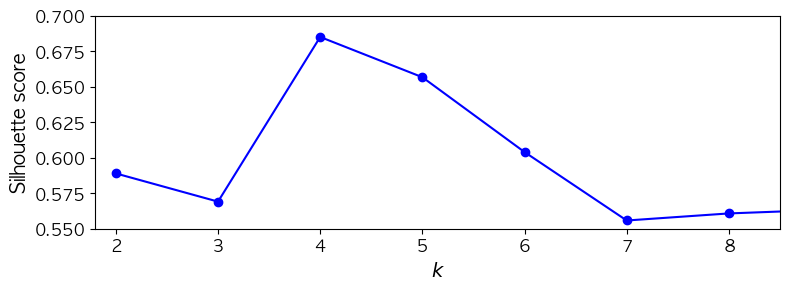

In [35]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))
      
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

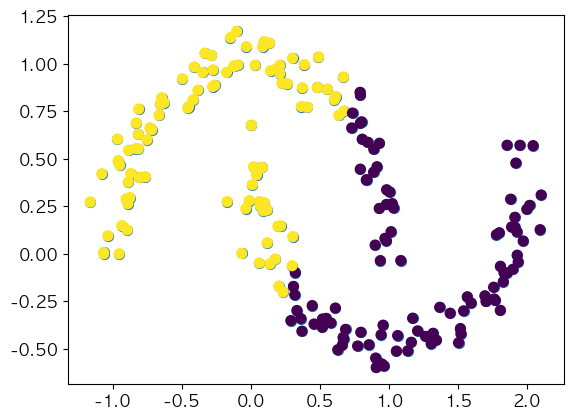

In [57]:
# k-means 의 한계

# 완전한 원형이 아닌 데이터 생성
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.075, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

labels = KMeans(2, random_state=42).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')